## Preparation
Preparing the data set 

#Import packages and Load data

In [ ]:
from google.colab import drive
import sys
drive.mount('/content/drive')
p='/content/drive/MyDrive/Laon_prediction_model/'
sys.path.append('/content/drive/MyDrive/Loanmodel_custom_modules')
#basepath  = '/content/drive/MyDrive/MachineLearning/Labs/Labs'
#sys.path.append('/content/drive/MyDrive/MachineLearning/Labs/Labs/Customfunctions')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import loan_preprocessing as lp
import confi as confi
import data_processing_pipeline as retrain

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
numpy
pandas
pickle
sys
Path is not installed. Installing...
os
seaborn
matplotlib.pyplot
scipy.stats
sklearn.preprocessing
warnings
IPython.core.display
category_encoders
pipeline


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
numpy
pandas
pickle
sys
Path is not installed. Installing...
os
seaborn
matplotlib.pyplot
scipy.stats
sklearn.preprocessing
warnings
IPython.core.display
category_encoders
pipeline


In [ ]:
import numpy as np
import pandas as pd
import pickle
import sys
from pathlib import Path
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_columns', 1500)
# set seed for reproducibility
np.random.seed(123)


import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [ ]:
df =pd.read_csv(p+'SBA_loans_project_2.zip').dropna(subset=['MIS_Status'])
y=df.MIS_Status

In [ ]:
from sklearn.model_selection import train_test_split
data,test=train_test_split(df,test_size=.2,stratify=y,random_state=1)

In [ ]:
test.drop(columns=['MIS_Status']).to_csv(p+'loan_test.csv',index=False)
test.MIS_Status.to_csv(p+'y_test.csv',index=False)
data.to_csv(p+'loan_train.csv',index=False)


In [ ]:
print("Data shape:", data.shape)

Data shape: (645960, 19)


In [ ]:
data.dtypes

City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
DisbursementGross     object
BalanceGross          object
GrAppv                object
SBA_Appv              object
MIS_Status            object
dtype: object

**Review dataset**

In [ ]:
#describe commands give a description of numeric columns only
data.describe()

,Zip,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,645960.000000,645960.000000,645960.000000,645868.000000,645960.000000,645960.000000,645960.000000,645960.000000
mean,53866.639422,398452.690047,11.457014,1.280545,8.587589,10.959290,2758.433535,0.757629
std,31177.128286,263308.203191,76.419235,0.451812,239.650547,240.038407,12772.408161,0.646782
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27610.000000,235210.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,55416.000000,445310.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,83707.000000,561730.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,99999.000000,928120.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


In [ ]:
data.head(n=10)

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
274390,COVENTRY,RI,2816,CITIZENS BANK NATL ASSOC,RI,235510,6,1.0,0,0,1,0,0,N,"$50,000.00",$0.00,"$50,000.00","$25,000.00",P I F
654005,LOS ANGELES,CA,90014,BANK OF AMERICA CALIFORNIA N.A,CA,0,1,1.0,0,0,1,0,0,N,"$20,000.00",$0.00,"$20,000.00","$10,000.00",P I F
498404,NORTH HOLLYWOOD,CA,91605,MISSION VALLEY BANK,CA,812320,10,1.0,3,10,1,1,T,N,"$140,275.00",$0.00,"$75,000.00","$37,500.00",P I F
725094,WILLISTON,VT,5495,KEYBANK NATIONAL ASSOCIATION,VT,441110,20,1.0,0,0,1,0,N,N,"$300,000.00",$0.00,"$300,000.00","$255,000.00",P I F
665779,FRESNO,CA,93720,CALIFORNIA BANK & TRUST,CA,0,2,1.0,2,0,1,0,0,N,"$55,000.00",$0.00,"$55,000.00","$44,000.00",P I F
319925,IRENE,SD,57037,WELLS FARGO BANK NATL ASSOC,SD,511110,3,1.0,0,0,1,0,N,Y,"$31,000.00",$0.00,"$31,000.00","$24,800.00",P I F
246108,SANTA CRUZ,CA,95060,"RABOBANK, NATIONAL ASSOCIATION",CA,0,10,1.0,0,0,1,0,N,Y,"$35,000.00",$0.00,"$35,000.00","$31,500.00",P I F
679966,SPOKANE,WA,99207,BANNER BANK,WA,451110,1,1.0,0,0,1,1,0,Y,"$69,100.00",$0.00,"$69,100.00","$55,280.00",P I F
82711,TEMPE,AZ,85281,ARIZONA BANK & TRUST,AZ,421830,5,1.0,0,0,1,0,N,Y,"$75,000.00",$0.00,"$75,000.00","$60,000.00",P I F
336136,GALENA,MO,65656,CONWAY BANK NATL ASSOC,KS,115113,10,1.0,0,0,1,0,N,N,"$92,350.00",$0.00,"$92,350.00","$79,421.00",CHGOFF


## Dataset preparation and clean-up

Modify and clean-up the dataset as following:
- Replace encode Na/Null values
- Convert the strings styled as '$XXXX.XX' to float values. Columns = ['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']
- Convert MIS_Status to 0/1. Make value "CHGOFF" as 1

In [ ]:
# colomn type
data.dtypes

City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
DisbursementGross     object
BalanceGross          object
GrAppv                object
SBA_Appv              object
MIS_Status            object
dtype: object

In [ ]:
data['MIS_Status']=data['MIS_Status'].replace({'CHGOFF':1,'P I F':0}).astype(float)

In [ ]:
money_columns_in_string_format=['DisbursementGross','GrAppv','SBA_Appv','BalanceGross']

In [ ]:
m=lp.money_data(variables=money_columns_in_string_format)
m.fit(data)
data=m.transform(data)
#data[money_columns_in_string_format]=data[money_columns_in_string_format].replace(replace_dict,regex=True).astype(float)

success


In [ ]:
data.head()

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
274390,COVENTRY,RI,2816,CITIZENS BANK NATL ASSOC,RI,235510,6,1.0,0,0,1,0,0,N,50000.0,0.0,50000.0,25000.0,0.0
654005,LOS ANGELES,CA,90014,BANK OF AMERICA CALIFORNIA N.A,CA,0,1,1.0,0,0,1,0,0,N,20000.0,0.0,20000.0,10000.0,0.0
498404,NORTH HOLLYWOOD,CA,91605,MISSION VALLEY BANK,CA,812320,10,1.0,3,10,1,1,T,N,140275.0,0.0,75000.0,37500.0,0.0
725094,WILLISTON,VT,5495,KEYBANK NATIONAL ASSOCIATION,VT,441110,20,1.0,0,0,1,0,N,N,300000.0,0.0,300000.0,255000.0,0.0
665779,FRESNO,CA,93720,CALIFORNIA BANK & TRUST,CA,0,2,1.0,2,0,1,0,0,N,55000.0,0.0,55000.0,44000.0,0.0


In [ ]:
Numerical_columns=[col for col in data.drop(columns=['MIS_Status']).columns if data[col].dtype!='object']
categorical_columns=[col for col in data.drop(columns=['MIS_Status']).columns if data[col].dtype=='object']

In [ ]:
print(Numerical_columns)

['Zip', 'NAICS', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']


In [ ]:
print(categorical_columns)

['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc']


In [ ]:
m=lp.Numerical_train_imputer(path=p,variables=Numerical_columns)
m.fit(data)
data=m.transform(data)

success


In [ ]:
m=lp.categorical_train_imputer(path=p,variables=categorical_columns)
m.fit(data)
data=m.transform(data)

success


In [ ]:
data.isna().sum()

City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
BalanceGross         0
GrAppv               0
SBA_Appv             0
MIS_Status           0
dtype: int64

In [ ]:
data.isnull().any()

City                 False
State                False
Zip                  False
Bank                 False
BankState            False
NAICS                False
NoEmp                False
NewExist             False
CreateJob            False
RetainedJob          False
FranchiseCode        False
UrbanRural           False
RevLineCr            False
LowDoc               False
DisbursementGross    False
BalanceGross         False
GrAppv               False
SBA_Appv             False
MIS_Status           False
dtype: bool

In [ ]:
# list columns with missing values
sum(data.isnull().any())

0

First I want to see the correlation of continouse variables to check features that can be dropped 

In [ ]:
df=data.drop(columns=['MIS_Status'])
corr_matrix=df.corr()

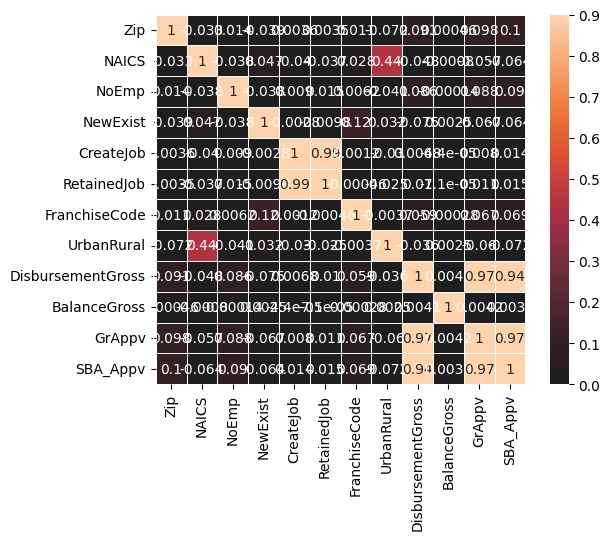

In [ ]:
# Create a heatmap of the correlation matrix having features which have correlation between .9 and 1 only
sns.heatmap(corr_matrix,color='green', annot=True, vmin=0, vmax=.9, center=0, square=True, linewidths=.5)
plt.show()

 I can trust this heatmap only for continous variables not for discrete variables so i will eliminate only continous colinear variables

In [ ]:
columns_to_drop=['SBA_Appv','DisbursementGross']

In [ ]:
data.dtypes

City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
DisbursementGross    float64
BalanceGross         float64
GrAppv               float64
SBA_Appv             float64
MIS_Status           float64
dtype: object

In [ ]:
discrete_col=[col for col in data.drop(columns='MIS_Status').columns if data[col].dtype=='int' or data[col].dtype=='object' ]
unique_values=[[data[col].nunique(),col] for col in discrete_col]
print(unique_values)

[[28625, 'City'], [52, 'State'], [30996, 'Zip'], [5483, 'Bank'], [56, 'BankState'], [1302, 'NAICS'], [534, 'NoEmp'], [219, 'CreateJob'], [329, 'RetainedJob'], [2510, 'FranchiseCode'], [3, 'UrbanRural'], [19, 'RevLineCr'], [8, 'LowDoc']]


Categorical Variables City, Zip are have large no of categories. Also because of different states have different policies. so it must depend on state not on city and zip. Hence i will drop these two columns

In [ ]:
columns_to_drop=columns_to_drop+['City','Zip']

In [ ]:
print(columns_to_drop)

['SBA_Appv', 'DisbursementGross', 'City', 'Zip']


In [ ]:
discrete_col=['State', 'Bank', 'BankState', 'NAICS', 'NoEmp', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc']

In [ ]:
m=lp.discrete_columns_matrix(variables=discrete_col)
df=m.fit(data)

In [ ]:
df.head(11)

,State,Bank,BankState,NAICS,NoEmp,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc
State,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bank,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BankState,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NAICS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NoEmp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CreateJob,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RetainedJob,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
FranchiseCode,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
UrbanRural,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RevLineCr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

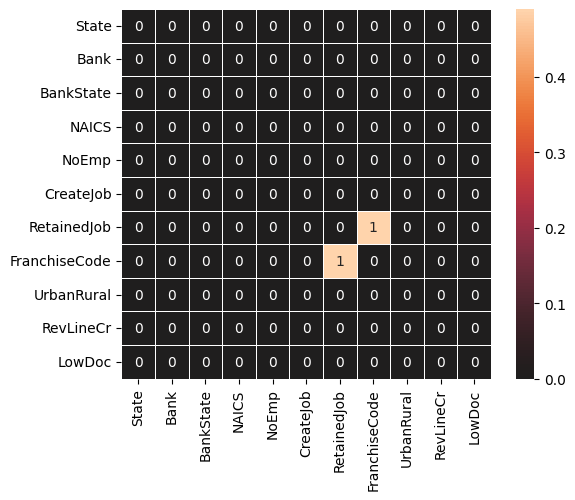

In [ ]:
sns.heatmap(df, annot=True, vmin=0, vmax=.49, center=0, square=True, linewidths=.5)

With chi2 test all categorical variables are dependent. But it may be because of any confounding variables or other factors. So i will not drop any variable by this analysis
Now i will do how the my loan amount, default status changes with my categorical variables

In [ ]:
data['bank_customer_state']=np.where(data['BankState']==data['State'],1,0)
# if will form a new column to check if the bank state is same state does it have any impact on default. as being in one state can align their policies and should reduce default

In [ ]:
data.head()

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status,bank_customer_state
274390,COVENTRY,RI,2816,CITIZENS BANK NATL ASSOC,RI,235510,6,1.0,0,0,1,0,0,N,50000.0,0.0,50000.0,25000.0,0.0,1
654005,LOS ANGELES,CA,90014,BANK OF AMERICA CALIFORNIA N.A,CA,0,1,1.0,0,0,1,0,0,N,20000.0,0.0,20000.0,10000.0,0.0,1
498404,NORTH HOLLYWOOD,CA,91605,MISSION VALLEY BANK,CA,812320,10,1.0,3,10,1,1,T,N,140275.0,0.0,75000.0,37500.0,0.0,1
725094,WILLISTON,VT,5495,KEYBANK NATIONAL ASSOCIATION,VT,441110,20,1.0,0,0,1,0,N,N,300000.0,0.0,300000.0,255000.0,0.0,1
665779,FRESNO,CA,93720,CALIFORNIA BANK & TRUST,CA,0,2,1.0,2,0,1,0,0,N,55000.0,0.0,55000.0,44000.0,0.0,1


In [ ]:
data.isna().sum()

City                   0
State                  0
Zip                    0
Bank                   0
BankState              0
NAICS                  0
NoEmp                  0
NewExist               0
CreateJob              0
RetainedJob            0
FranchiseCode          0
UrbanRural             0
RevLineCr              0
LowDoc                 0
DisbursementGross      0
BalanceGross           0
GrAppv                 0
SBA_Appv               0
MIS_Status             0
bank_customer_state    0
dtype: int64

In [ ]:
data.groupby("MIS_Status")['MIS_Status'].count()

MIS_Status
0.0    532653
1.0    113307
Name: MIS_Status, dtype: int64

In [ ]:
print(data.groupby("MIS_Status")["MIS_Status"].count()*100/data["MIS_Status"].count())

MIS_Status
0.0    82.459131
1.0    17.540869
Name: MIS_Status, dtype: float64


It is highly imbalanced data. So i can go for undersampling or oversampling. I can also choose a proper matrix for model evaluation to overcome this imbalance.
To overcome this imbalance data problem i will use f1 score for evaluation. 

In [ ]:
#defaulters in lowdoc
print(data.LowDoc.unique())
n = pd.unique(data['LowDoc'])
d=dict()
for i in data.LowDoc:
  if i in d.keys():
    d[i]+=1
  else:
    d[i]=1
print
print(d)
for i in d.keys():
  d[i]=d[i]*100/(data.shape[0])
print(d)
#Majority of loan applications has 'Y' or 'N' category other variables are very less in number can be entering error or very few special application cases

['N' 'Y' 'Missing' 'S' '0' 'A' 'C' 'R']
{'N': 562217, 'Y': 79383, 'Missing': 1909, 'S': 435, '0': 1063, 'A': 351, 'C': 544, 'R': 58}
{'N': 87.03588457489627, 'Y': 12.289151031023593, 'Missing': 0.29552913493095545, 'S': 0.0673416310607468, '0': 0.1645612731438479, 'A': 0.05433772989039569, 'C': 0.08421574091275001, 'R': 0.008978884141432907}


I want to check if my default rate more in lowdoc applications and how the loan amount of defaulted cases vary in lowdoc and non lowdoc applications

In [ ]:
df_lowdoc=data[data['LowDoc']=='Y']
df_lowdoc_d=df_lowdoc[df_lowdoc['MIS_Status']==1]
df_lowdoc_Nd=df_lowdoc[df_lowdoc['MIS_Status']==0]
print(f'percentage of defauled cases in low doc applications {df_lowdoc_d.shape[0]*100/df_lowdoc.shape[0]}')
print(f'No of defaulted cases in lowdoc cases {df_lowdoc_d.shape[0]}')
print(f'percentage of non defauled cases in low doc applications {df_lowdoc_Nd.shape[0]*100/df_lowdoc.shape[0]}')
print(f'no of non defauled cases in low doc applications {df_lowdoc_Nd.shape[0]}')

percentage of defauled cases in low doc applications 9.023342529256894
No of defaulted cases in lowdoc cases 7163
percentage of non defauled cases in low doc applications 90.9766574707431
no of non defauled cases in low doc applications 72220


In [ ]:
df_lowdoc=data[data['LowDoc']=='N']
df_lowdoc_d=df_lowdoc[df_lowdoc['MIS_Status']==1]
df_lowdoc_Nd=df_lowdoc[df_lowdoc['MIS_Status']==0]
print(f'percentage of defauled cases in non low doc applications {df_lowdoc_d.shape[0]*100/df_lowdoc.shape[0]}')
print(f'number of defauled cases in non low doc applications {df_lowdoc_d.shape[0]}')
print(f'percentage of non defauled cases in non low doc applications {df_lowdoc_Nd.shape[0]*100/df_lowdoc.shape[0]}')
print(f'non of defauled cases in non low doc applications {df_lowdoc_Nd.shape[0]}')
#Non low doc applications have higher percentage of defaulted cases

percentage of defauled cases in non low doc applications 18.67769606273894
number of defauled cases in non low doc applications 131276
percentage of non defauled cases in non low doc applications 81.32230393726107
non of defauled cases in non low doc applications 571573



Now I want to check the average gvr sanctioned loan in lowdoc and non lowdoc laons and then in defaulted and non defaulted cases I will also check if that difference is statistically significant

<Axes: xlabel='LowDoc', ylabel='GrAppv'>

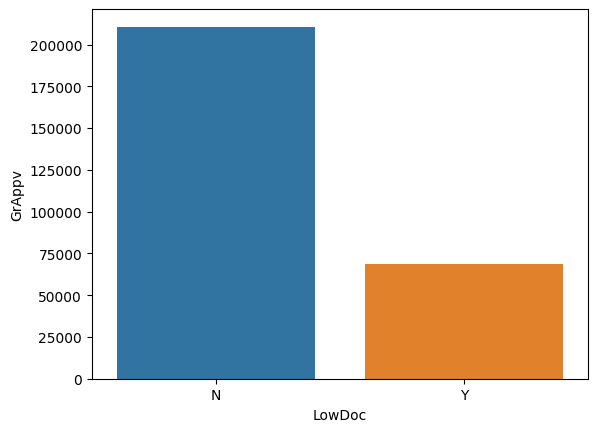

In [ ]:
data1=data[(data['LowDoc']=='Y') | (data['LowDoc']=='N')]
df1=data1.groupby(['LowDoc'])['GrAppv'].mean()
df1=df1.reset_index()
sns.barplot(x='LowDoc',y='GrAppv',data=df1)
#we see that average loan amount that was approved in lowdoc is much less than that was approved with all documents

<Axes: xlabel='LowDoc', ylabel='GrAppv'>

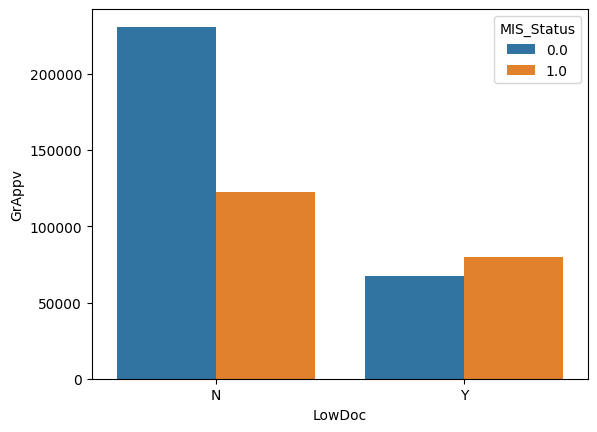

In [ ]:
data2=data1.groupby(['LowDoc','MIS_Status'])['GrAppv'].mean()
data2=data2.reset_index()
sns.barplot(x='LowDoc',y='GrAppv',hue='MIS_Status',data=data2)
#this mean amount is same in low doc application but differ greatly in non low doc applications

In [ ]:
print(np.var(data1[data1['LowDoc']=='N']['GrAppv'])/np.var(data1[data1['LowDoc']=='Y']['GrAppv']))
#unequal variance

62.67990712256727


In [ ]:
from scipy.stats import ttest_ind
ttest_ind(data1[data1['LowDoc']=='Y']['GrAppv'],data1[data1['LowDoc']=='N']['GrAppv'],equal_var=False)
#it is statistically different

Ttest_indResult(statistic=-378.19235128427704, pvalue=0.0)

In [ ]:
data2=data1[data1['LowDoc']=='N']
print(np.var(data2[data2['MIS_Status']==0]['GrAppv'])/np.var(data2[data2['MIS_Status']==1]['GrAppv']))
#Equal variance

1.9958809404258602


In [ ]:
ttest_ind(data2[data2['MIS_Status']==0]['GrAppv'],data2[data2['MIS_Status']==1]['GrAppv'],alternative='greater')
#they are statistically significant

Ttest_indResult(statistic=120.17970294133819, pvalue=0.0)

<Axes: xlabel='MIS_Status', ylabel='GrAppv'>

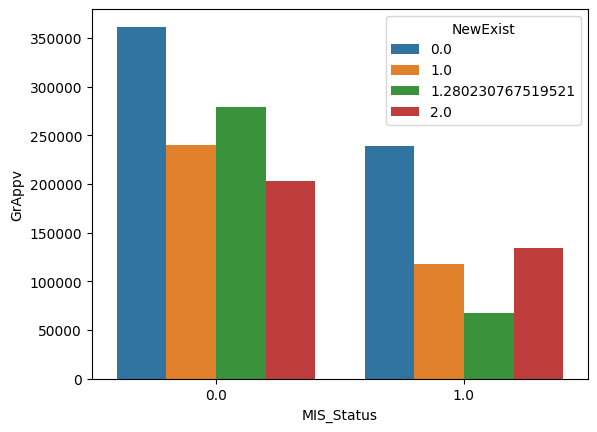

In [ ]:
data5=data2.groupby(['MIS_Status','NewExist'])['GrAppv'].mean()
data5=data5.reset_index()
sns.barplot(x='MIS_Status',y='GrAppv',hue='NewExist',data=data5)
#average loan amount is almost same for both existing and non existing in both default and non default

<Axes: xlabel='MIS_Status', ylabel='GrAppv'>

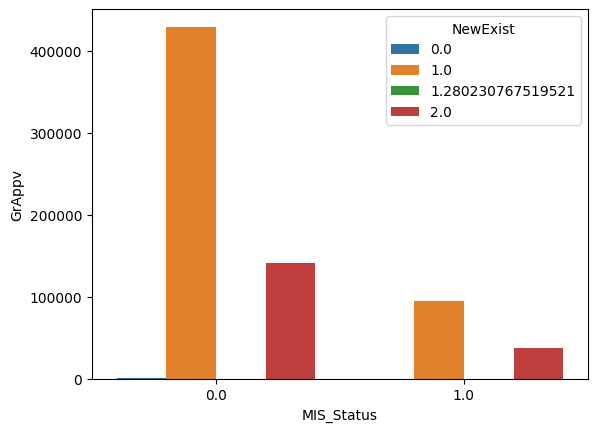

In [ ]:
data5=data2.groupby(['MIS_Status','NewExist'])['GrAppv'].count()
data5=data5.reset_index()
sns.barplot(x='MIS_Status',y='GrAppv',hue='NewExist',data=data5)
# In both categories more no of applications are for new firms

In [ ]:
data3=data1[data1['LowDoc']=='Y']
print(np.var(data3[data3['MIS_Status']==1]['GrAppv'])/np.var(data3[data3['MIS_Status']==0]['GrAppv']))

1.159544973944027


<Axes: xlabel='MIS_Status', ylabel='GrAppv'>

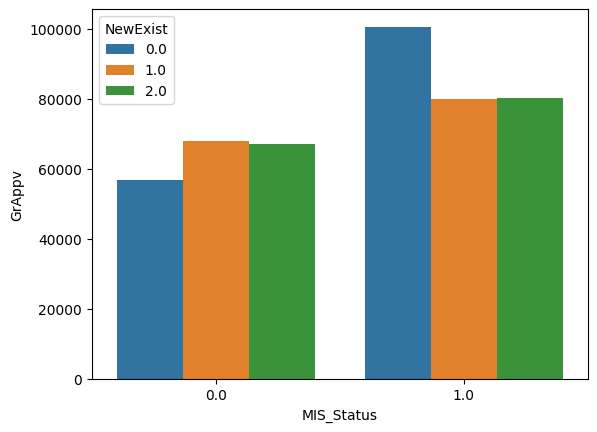

In [ ]:
data4=data3.groupby(['MIS_Status','NewExist'])['GrAppv'].mean()
data4=data4.reset_index()
sns.barplot(x='MIS_Status',y='GrAppv',hue='NewExist',data=data4)
#No difference in average loan I want to see count of numbers

<Axes: xlabel='MIS_Status', ylabel='GrAppv'>

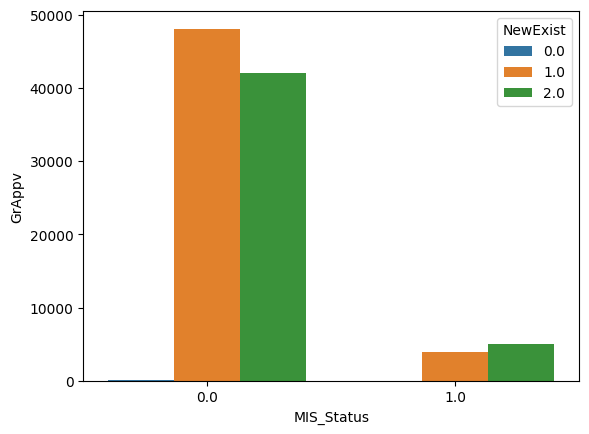

In [ ]:
data4=data3.groupby(['MIS_Status','NewExist'])['GrAppv'].count()
data4=data4.reset_index()
sns.barplot(x='MIS_Status',y='GrAppv',hue='NewExist',data=data4)
#count is also same so we cannot decide on basis if the new or not for lowdoc application

In [ ]:
ttest_ind(data3[data3['MIS_Status']==0]['GrAppv'],data3[data3['MIS_Status']==1]['GrAppv'],alternative='less')
#so non defaulter mean loan amount is less in lowdoc loan

Ttest_indResult(statistic=-30.1582304102937, pvalue=3.33734374086086e-199)

<Axes: xlabel='GrAppv', ylabel='Count'>

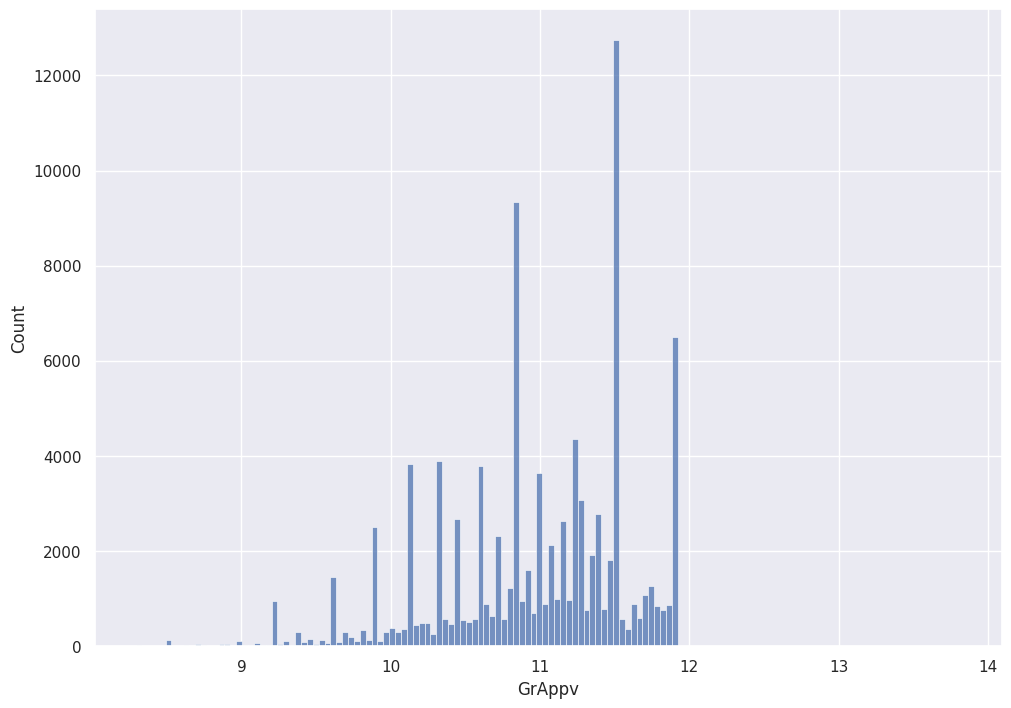

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=data1[data1['LowDoc']=='Y'],x=np.log(data1[data1['LowDoc']=='Y'].GrAppv))

<Axes: xlabel='LowDoc', ylabel='GrAppv'>

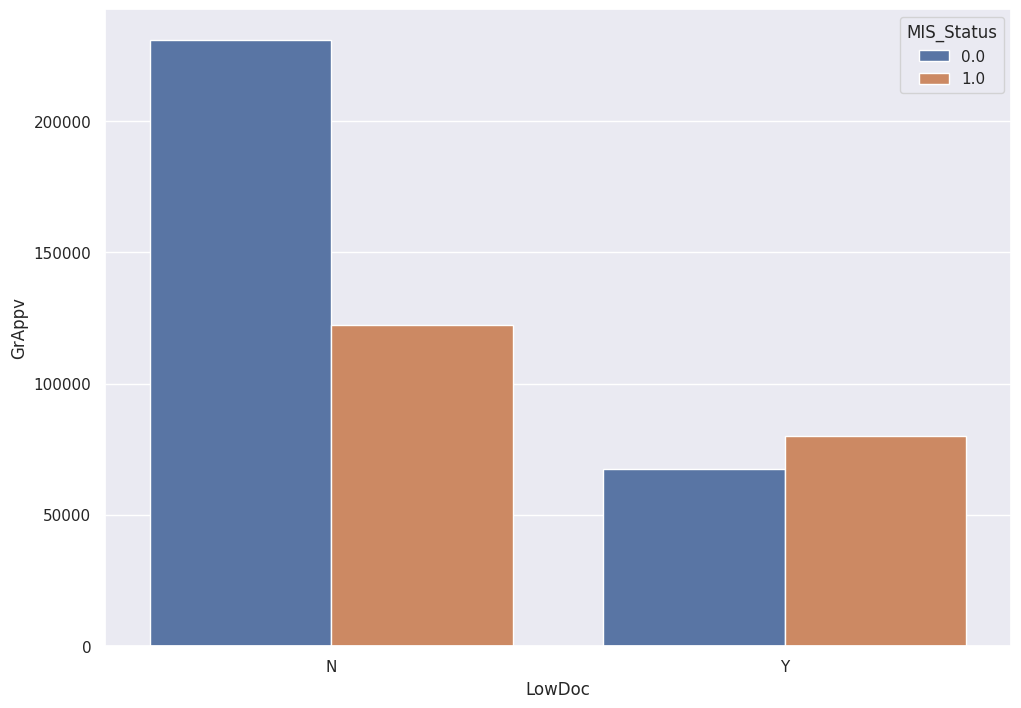

In [ ]:
df1=data1.groupby(['MIS_Status','LowDoc'])['GrAppv'].mean()
df1=df1.reset_index()
sns.barplot(x='LowDoc',y='GrAppv',hue='MIS_Status',data=df1)

In [ ]:
data.head()

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status,bank_customer_state
274390,COVENTRY,RI,2816,CITIZENS BANK NATL ASSOC,RI,235510,6,1.0,0,0,1,0,0,N,50000.0,0.0,50000.0,25000.0,0.0,1
654005,LOS ANGELES,CA,90014,BANK OF AMERICA CALIFORNIA N.A,CA,0,1,1.0,0,0,1,0,0,N,20000.0,0.0,20000.0,10000.0,0.0,1
498404,NORTH HOLLYWOOD,CA,91605,MISSION VALLEY BANK,CA,812320,10,1.0,3,10,1,1,T,N,140275.0,0.0,75000.0,37500.0,0.0,1
725094,WILLISTON,VT,5495,KEYBANK NATIONAL ASSOCIATION,VT,441110,20,1.0,0,0,1,0,N,N,300000.0,0.0,300000.0,255000.0,0.0,1
665779,FRESNO,CA,93720,CALIFORNIA BANK & TRUST,CA,0,2,1.0,2,0,1,0,0,N,55000.0,0.0,55000.0,44000.0,0.0,1


In [ ]:
print(columns_to_drop)

['SBA_Appv', 'DisbursementGross', 'City', 'Zip']


In [ ]:
m=lp.drop_colunms(variables=columns_to_drop)
m.fit(data)
data=m.transform(data)

success


In [ ]:
data.head()

,State,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,BalanceGross,GrAppv,MIS_Status,bank_customer_state
274390,RI,CITIZENS BANK NATL ASSOC,RI,235510,6,1.0,0,0,1,0,0,N,0.0,50000.0,0.0,1
654005,CA,BANK OF AMERICA CALIFORNIA N.A,CA,0,1,1.0,0,0,1,0,0,N,0.0,20000.0,0.0,1
498404,CA,MISSION VALLEY BANK,CA,812320,10,1.0,3,10,1,1,T,N,0.0,75000.0,0.0,1
725094,VT,KEYBANK NATIONAL ASSOCIATION,VT,441110,20,1.0,0,0,1,0,N,N,0.0,300000.0,0.0,1
665779,CA,CALIFORNIA BANK & TRUST,CA,0,2,1.0,2,0,1,0,0,N,0.0,55000.0,0.0,1


Now I will encode my categorical variables.
For categorical columns having less than 10 categories i will do one hot encoding.
For categorical columns having more than 10 categories i will do target encoding.

In [ ]:
train=data.drop(columns=['MIS_Status'],axis=1)
y_train=data.MIS_Status

In [ ]:
categorical_encode_column=[col for col in data.drop(columns=['MIS_Status']).columns if data[col].nunique()<10 and data[col].dtype=='object']
target_encode_column=[col for col in data.drop(columns=['MIS_Status']).columns if data[col].nunique()>=10 and data[col].dtype=='object']

In [ ]:
M=lp.onehot_train_encoder(path=p,enc=OneHotEncoder(handle_unknown='ignore',sparse=False),variables=categorical_encode_column)
M.fit(train)
train=M.transform(train)


success


In [ ]:
M=lp.target_train_encoder(path=p,enc=TargetEncoder(handle_unknown='value'),variables=target_encode_column)
M.fit(train,y_train)
train=M.transform(train)

success


In [ ]:
train.head()

,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,BalanceGross,GrAppv,bank_customer_state,LowDoc_0,LowDoc_A,LowDoc_C,LowDoc_Missing,LowDoc_N,LowDoc_R,LowDoc_S,LowDoc_Y,State_trg,Bank_trg,BankState_trg,RevLineCr_trg
274390,235510,6,1.0,0,0,1,0,0.0,50000.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.115118,0.220605,0.201965,0.149681
654005,0,1,1.0,0,0,1,0,0.0,20000.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.185354,0.071820,0.220651,0.149681
498404,812320,10,1.0,3,10,1,1,0.0,75000.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.185354,0.055358,0.220651,0.428624
725094,441110,20,1.0,0,0,1,0,0.0,300000.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.078162,0.120415,0.059015,0.146405
665779,0,2,1.0,2,0,1,0,0.0,55000.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.185354,0.207698,0.220651,0.149681


In [ ]:
scaling_columns=['NAICS'	,'NoEmp',	'NewExist','CreateJob','RetainedJob','FranchiseCode','UrbanRural','BalanceGross','GrAppv']

In [ ]:
m=lp.scalar_train_encoder(path=p,scale=MinMaxScaler(),variables=scaling_columns)
m.fit(train)
train=m.transform(train)

success


In [ ]:
train.head()

,bank_customer_state,LowDoc_0,LowDoc_A,LowDoc_C,LowDoc_Missing,LowDoc_N,LowDoc_R,LowDoc_S,LowDoc_Y,State_trg,Bank_trg,BankState_trg,RevLineCr_trg,NAICS_scale,NoEmp_scale,NewExist_scale,CreateJob_scale,RetainedJob_scale,FranchiseCode_scale,UrbanRural_scale,BalanceGross_scale,GrAppv_scale
274390,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.115118,0.220605,0.201965,0.149681,0.253750,0.0006,0.5,0.000000,0.000000,0.00001,0.0,0.0,0.008956
654005,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.185354,0.071820,0.220651,0.149681,0.000000,0.0001,0.5,0.000000,0.000000,0.00001,0.0,0.0,0.003473
498404,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.185354,0.055358,0.220651,0.428624,0.875232,0.0010,0.5,0.000341,0.001053,0.00001,0.5,0.0,0.013526
725094,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.078162,0.120415,0.059015,0.146405,0.475273,0.0020,0.5,0.000000,0.000000,0.00001,0.0,0.0,0.054652
665779,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.185354,0.207698,0.220651,0.149681,0.000000,0.0002,0.5,0.000227,0.000000,0.00001,0.0,0.0,0.009870


In [ ]:
train.isna().sum()

bank_customer_state    0
LowDoc_0               0
LowDoc_A               0
LowDoc_C               0
LowDoc_Missing         0
LowDoc_N               0
LowDoc_R               0
LowDoc_S               0
LowDoc_Y               0
State_trg              0
Bank_trg               0
BankState_trg          0
RevLineCr_trg          0
NAICS_scale            0
NoEmp_scale            0
NewExist_scale         0
CreateJob_scale        0
RetainedJob_scale      0
FranchiseCode_scale    0
UrbanRural_scale       0
BalanceGross_scale     0
GrAppv_scale           0
dtype: int64

# Model Training

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data=pd.read_csv(confi.train_path)
t=retrain.train_function()
data=t.train_function(data)

success
success
success
success
success
success
success


In [ ]:
train=data.drop(columns=['MIS_Status'])
y_train=data.MIS_Status

In [ ]:
xg=XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)
scores = cross_val_score(xg, train, y_train, scoring='f1', cv=cv, n_jobs=3)
print(scores)

[0.43017081 0.42991763 0.43462379 0.43110544 0.43189142 0.42636999]


In [ ]:
rf=RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)
scores = cross_val_score(rf, train, y_train, scoring='f1', cv=cv, n_jobs=3)
print(scores)

[0.42749772 0.42554513 0.42437822 0.42916495 0.42785932 0.42851262]


# Model Tunning

In [ ]:
xg=XGBClassifier()
parameter_grid={ 'eta':[.001,0.01,.1,.5,.9],'n_estimators':[100,300,500,700,900],'subsample':[.4,.6,.8,1],'learning_rate':[.001,.01,.1,.5,.9]}
grid1=RandomizedSearchCV(xg,parameter_grid,cv=3,verbose=5,n_jobs=3,scoring='f1')
grid1.fit(train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=3,
                   param_distributions={'eta': [0.001, 0.01, 0.1, 0.5, 0.9],
                                        'learning_rate': [0.001, 0.01, 0.1, 0.5,
                                                          0.9],
                                        'n_estimators': [100, 300, 500, 700,
                                                         900],
                                        'subsample': [0.4, 0.6, 0.8, 1]},
                   scoring='f1', verbose=5)

In [ ]:
print(grid1.best_score_)
print(grid1.best_estimator_)

0.4489688605000808
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.9, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=900, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)


In [ ]:
rf=RandomForestClassifier(n_jobs=3)
parameter_grid={ 'ccp_alpha':[0,.4,.8,1.2,1.5],'n_estimators':[100,300,500,700,900],'min_samples_split':[2,5,10,15,20]}
grid=RandomizedSearchCV(rf,parameter_grid,cv=2,verbose=5,n_jobs=3,scoring='f1')
grid.fit(train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=3), n_jobs=3,
                   param_distributions={'ccp_alpha': [0, 0.4, 0.8, 1.2, 1.5],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [100, 300, 500, 700,
                                                         900]},
                   scoring='f1', verbose=5)

In [ ]:
print(grid.best_score_)
print(grid.best_estimator_)

0.42601472155621334
RandomForestClassifier(ccp_alpha=0, n_estimators=300, n_jobs=3)


# Now i will apply stacking using two models with best estimators and will save that model for test data set 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
level0=list()
level0.append(('rf',RandomForestClassifier(ccp_alpha=0 ,n_estimators=300 , min_samples_split=2,n_jobs=3)))
level0.append(('xg',XGBClassifier(eta=0.1,learning_rate=.9, n_estimators=900,n_jobs=3)))
level1 = LogisticRegression()
stacking_final = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
stackingfinal=stacking_final.fit(train,y_train)

In [ ]:
# Save the object to a file using pickle.dump
filename = '{}_model.pkl'.format(stackingfinal.__class__.__name__)
with open(filename, 'wb') as f:
    pickle.dump(stackingfinal, f)

In [ ]:
f=open('/content/StackingClassifier_model.pkl','rb')

In [ ]:
filename = '/content/drive/MyDrive/Loanmodel_custom_modules/{}_model.pkl'.format(stackingfinal.__class__.__name__)
with open(filename, 'wb') as f:
    pickle.dump(stackingfinal, f)